In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import datetime

#### Merging 12 months sales data into a single cell

In [43]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

merged_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+ file)
    merged_data = pd.concat([merged_data, df])
    
merged_data.to_csv("merged_data.csv", index=False)

#### Reading the updated dataframe

In [44]:
merged_data = pd.read_csv('merged_data.csv')
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [45]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Data Cleaning

##### Displaying cells/rows with nan values

In [46]:
nan_df = merged_data[merged_data.isnull().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
merged_data = merged_data.dropna(how='all')
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


##### Checking and removing duplicates

In [45]:
df2 = merged_data[merged_data.duplicated()]
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
21,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001"
658,248787,AA Batteries (4-pack),1,3.84,09/09/19 12:30,"705 Adams St, San Francisco, CA 94016"
1822,249895,34in Ultrawide Monitor,1,379.99,09/19/19 22:14,"901 South St, San Francisco, CA 94016"
1839,249910,AAA Batteries (4-pack),1,2.99,09/09/19 18:34,"295 Meadow St, San Francisco, CA 94016"
2113,250174,Apple Airpods Headphones,1,150,09/30/19 19:32,"490 6th St, New York City, NY 10001"
...,...,...,...,...,...,...
185597,149308,Apple Airpods Headphones,1,150,01/02/19 23:07,"351 Madison St, New York City, NY 10001"
185817,149515,USB-C Charging Cable,1,11.95,01/14/19 21:19,"913 10th St, Los Angeles, CA 90001"
186050,149738,USB-C Charging Cable,1,11.95,01/11/19 11:22,"612 West St, New York City, NY 10001"
186438,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Dropping the duplicated data

In [46]:
merged_data = df2.drop_duplicates()
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
21,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001"
658,248787,AA Batteries (4-pack),1,3.84,09/09/19 12:30,"705 Adams St, San Francisco, CA 94016"
1822,249895,34in Ultrawide Monitor,1,379.99,09/19/19 22:14,"901 South St, San Francisco, CA 94016"
1839,249910,AAA Batteries (4-pack),1,2.99,09/09/19 18:34,"295 Meadow St, San Francisco, CA 94016"
2113,250174,Apple Airpods Headphones,1,150,09/30/19 19:32,"490 6th St, New York City, NY 10001"
...,...,...,...,...,...,...
185436,149149,Lightning Charging Cable,1,14.95,01/12/19 12:30,"180 1st St, Boston, MA 02215"
185597,149308,Apple Airpods Headphones,1,150,01/02/19 23:07,"351 Madison St, New York City, NY 10001"
185817,149515,USB-C Charging Cable,1,11.95,01/14/19 21:19,"913 10th St, Los Angeles, CA 90001"
186050,149738,USB-C Charging Cable,1,11.95,01/11/19 11:22,"612 West St, New York City, NY 10001"


#### Spliting the 'Order Date' column into Month and Time columns

In [48]:
# Convert 'Order Date' column from object to datetime
merged_data[ 'Order Date'] = pd.to_datetime(merged_data['Order Date'], errors='coerce')
# Add a month column
merged_data.loc[:,'Month'] = merged_data['Order Date'].dt.month
#Add a time column
merged_data.loc[:,'Time'] = merged_data['Order Date'].dt.time
merged_data.head() 

/tmp/ipykernel_15990/3202776783.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data[ 'Order Date'] = pd.to_datetime(merged_data['Order Date'], errors='coerce')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9.0,14:44:00
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9.0,10:19:00
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9.0,17:48:00
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9.0,07:52:00
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9.0,19:03:00


In [49]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  object        
 3   Price Each        186305 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
 6   Month             185950 non-null  float64       
 7   Time              185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 12.8+ MB


In [50]:
#checking nan value in the Month column created
nan_values = merged_data[merged_data['Month'].isna()]
nan_values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time
1679,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
3732,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
3790,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
4323,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
5579,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
...,...,...,...,...,...,...,...,...
183633,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
184671,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
184801,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
185398,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN


In [51]:
# Cleaning by removing the NaN & Natvalues from the month column
merged_data.dropna(subset=['Month'], inplace=True)

# Resetting the DataFrame index
merged_data.reset_index(drop=True, inplace=True)

In [52]:
# Confirming the contents of the specified row with indexing
df = merged_data.loc[merged_data.index == 3732]
print(df)

     Order ID                 Product Quantity Ordered Price Each  \
3732   251749  34in Ultrawide Monitor                1     379.99   

              Order Date                  Purchase Address  Month      Time  
3732 2019-09-15 13:25:00  512 Jackson St, Dallas, TX 75001    9.0  13:25:00  


In [53]:
# Dropping the row from the Merged dataframe
merged_data.drop(3732, inplace=True)

In [54]:
# Converting the Month column to an integer.  
merged_data[ 'Month'] = merged_data['Month'].astype('int32')

In [55]:
#Confirming the data types of the month and time columns
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185949 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185949 non-null  object        
 1   Product           185949 non-null  object        
 2   Quantity Ordered  185949 non-null  object        
 3   Price Each        185949 non-null  object        
 4   Order Date        185949 non-null  datetime64[ns]
 5   Purchase Address  185949 non-null  object        
 6   Month             185949 non-null  int32         
 7   Time              185949 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 12.1+ MB


### Data Exploration
Solving the main business questions related to the data
### Task A.  What was the best month of sales? How much was earned that month?

In [56]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00


##### Adding a sales column

In [57]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 185949 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185949 non-null  object        
 1   Product           185949 non-null  object        
 2   Quantity Ordered  185949 non-null  object        
 3   Price Each        185949 non-null  object        
 4   Order Date        185949 non-null  datetime64[ns]
 5   Purchase Address  185949 non-null  object        
 6   Month             185949 non-null  int32         
 7   Time              185949 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 12.1+ MB


#### Converting Sales and Quantity ordered columns to the correct data types

In [58]:
merged_data['Price Each'] = pd.to_numeric(merged_data['Price Each'])
merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered'])

In [59]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185949 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185949 non-null  object        
 1   Product           185949 non-null  object        
 2   Quantity Ordered  185949 non-null  int64         
 3   Price Each        185949 non-null  float64       
 4   Order Date        185949 non-null  datetime64[ns]
 5   Purchase Address  185949 non-null  object        
 6   Month             185949 non-null  int32         
 7   Time              185949 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 12.1+ MB


In [127]:
merged_data['Total sales'] = merged_data['Quantity Ordered'] * merged_data['Price Each']
merged_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,sales,City,Total sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36,"Los Angeles, CA",15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90,"Austin, TX",23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95,"Los Angeles, CA",11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99,"Seattle, WA",149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95,"Atlanta, GA",11.95
5,248156,34in Ultrawide Monitor,1,379.99,2019-09-13 14:59:00,"469 12th St, Los Angeles, CA 90001",9,14:59:00,379.99,"Los Angeles, CA",379.99
6,248157,Lightning Charging Cable,1,14.95,2019-09-07 09:59:00,"773 Johnson St, Portland, ME 04101",9,09:59:00,14.95,"Portland, ME",14.95
7,248158,Lightning Charging Cable,1,14.95,2019-09-02 14:16:00,"682 Sunset St, Los Angeles, CA 90001",9,14:16:00,14.95,"Los Angeles, CA",14.95
8,248159,Vareebadd Phone,1,400.00,2019-09-06 16:45:00,"664 Wilson St, New York City, NY 10001",9,16:45:00,400.00,"New York City, NY",400.00
9,248160,Wired Headphones,1,11.99,2019-09-01 22:03:00,"446 9th St, San Francisco, CA 94016",9,22:03:00,11.99,"San Francisco, CA",11.99


In [129]:
# Checking the best month of sales & the amount earned in that month
#Task1: Groupby month

best_month = merged_data.groupby('Month').agg({
    'Quantity Ordered': 'sum',
    'Total sales': 'sum'
}).reset_index()
best_month

,Month,Quantity Ordered,Total sales
0,1,10903,1822256.73
1,2,13449,2202022.42
2,3,17005,2807100.38
3,4,20558,3390670.24
4,5,18667,3152606.75
5,6,15253,2577802.26
6,7,16072,2647775.76
7,8,13448,2244467.88
8,9,13108,2097180.14
9,10,22703,3736726.88


In [130]:
# setting the best_month df in descending order
best_month.sort_values(by='Total sales', ascending=False)

,Month,Quantity Ordered,Total sales
11,12,28114,4613443.34
9,10,22703,3736726.88
3,4,20558,3390670.24
10,11,19798,3199603.20
4,5,18667,3152606.75
2,3,17005,2807100.38
6,7,16072,2647775.76
5,6,15253,2577802.26
7,8,13448,2244467.88
1,2,13449,2202022.42


#### Visualizing the Task A results

range(1, 13)


Text(0.5, 1.0, 'Sales by Month')

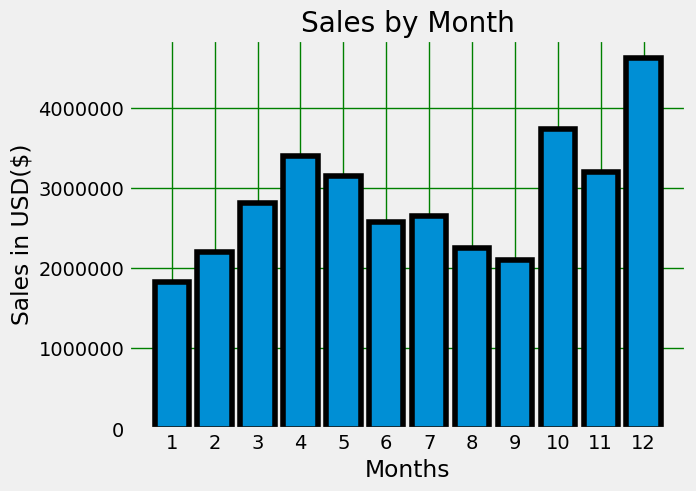

In [131]:
months = range(1,13)
print(months)
plt.bar(months, best_month['Total sales'], color="#008fd5", linewidth=4, edgecolor='black')
plt.xticks(months)

#removing scientific notation
#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ticklabel_format(style='plain') 


plt.style.use('fivethirtyeight')
plt.grid(color= 'green', linestyle = '-')
plt.ylabel("Sales in USD($)")
plt.xlabel("Months")
plt.title('Sales by Month')


### Task A Results:  
#### What was the best month of sales? December 
#### How much was earned that month? $4613443.34

## Task B: What city sold the most product?

In [132]:
merged_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,sales,City,Total sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36,"Los Angeles, CA",15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90,"Austin, TX",23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95,"Los Angeles, CA",11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99,"Seattle, WA",149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95,"Atlanta, GA",11.95
5,248156,34in Ultrawide Monitor,1,379.99,2019-09-13 14:59:00,"469 12th St, Los Angeles, CA 90001",9,14:59:00,379.99,"Los Angeles, CA",379.99
6,248157,Lightning Charging Cable,1,14.95,2019-09-07 09:59:00,"773 Johnson St, Portland, ME 04101",9,09:59:00,14.95,"Portland, ME",14.95
7,248158,Lightning Charging Cable,1,14.95,2019-09-02 14:16:00,"682 Sunset St, Los Angeles, CA 90001",9,14:16:00,14.95,"Los Angeles, CA",14.95
8,248159,Vareebadd Phone,1,400.00,2019-09-06 16:45:00,"664 Wilson St, New York City, NY 10001",9,16:45:00,400.00,"New York City, NY",400.00
9,248160,Wired Headphones,1,11.99,2019-09-01 22:03:00,"446 9th St, San Francisco, CA 94016",9,22:03:00,11.99,"San Francisco, CA",11.99


### Steps
#### Step 1: Extract the location from the purchase address column and store the data in a new location column.
#### Step 2: Groupd the data by the quantity ordered and products ,arranging it in descending order.

In [133]:
# Step 1
merged_data['City'] = [x.split(',')[1] for x in merged_data['Purchase Address'].values]
merged_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,sales,City,Total sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36,Los Angeles,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90,Austin,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95,Los Angeles,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99,Seattle,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95,Atlanta,11.95
5,248156,34in Ultrawide Monitor,1,379.99,2019-09-13 14:59:00,"469 12th St, Los Angeles, CA 90001",9,14:59:00,379.99,Los Angeles,379.99
6,248157,Lightning Charging Cable,1,14.95,2019-09-07 09:59:00,"773 Johnson St, Portland, ME 04101",9,09:59:00,14.95,Portland,14.95
7,248158,Lightning Charging Cable,1,14.95,2019-09-02 14:16:00,"682 Sunset St, Los Angeles, CA 90001",9,14:16:00,14.95,Los Angeles,14.95
8,248159,Vareebadd Phone,1,400.00,2019-09-06 16:45:00,"664 Wilson St, New York City, NY 10001",9,16:45:00,400.00,New York City,400.00
9,248160,Wired Headphones,1,11.99,2019-09-01 22:03:00,"446 9th St, San Francisco, CA 94016",9,22:03:00,11.99,San Francisco,11.99


In [134]:
merged_data['City'] = [x.split(',')[1] + ', ' + x.split(',')[2].split(' ')[1] for x in merged_data['Purchase Address'].values]
merged_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,sales,City,Total sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36,"Los Angeles, CA",15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90,"Austin, TX",23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95,"Los Angeles, CA",11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99,"Seattle, WA",149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95,"Atlanta, GA",11.95
5,248156,34in Ultrawide Monitor,1,379.99,2019-09-13 14:59:00,"469 12th St, Los Angeles, CA 90001",9,14:59:00,379.99,"Los Angeles, CA",379.99
6,248157,Lightning Charging Cable,1,14.95,2019-09-07 09:59:00,"773 Johnson St, Portland, ME 04101",9,09:59:00,14.95,"Portland, ME",14.95
7,248158,Lightning Charging Cable,1,14.95,2019-09-02 14:16:00,"682 Sunset St, Los Angeles, CA 90001",9,14:16:00,14.95,"Los Angeles, CA",14.95
8,248159,Vareebadd Phone,1,400.00,2019-09-06 16:45:00,"664 Wilson St, New York City, NY 10001",9,16:45:00,400.00,"New York City, NY",400.00
9,248160,Wired Headphones,1,11.99,2019-09-01 22:03:00,"446 9th St, San Francisco, CA 94016",9,22:03:00,11.99,"San Francisco, CA",11.99


In [137]:
# Step 2 :grouping data by city and getting the sum column
df_results = merged_data.groupby('City')[['Quantity Ordered', 'Price Each','Month', 'sales']].sum()
df_results

,Quantity Ordered,Price Each,Month,sales
City,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16729,2752247.83,104611,2767595.41
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Portland, ME",2750,447189.25,17144,449758.27
"Portland, OR",11303,1860558.22,70621,1870732.34
"San Francisco, CA",50239,8211461.74,315520,8262203.91
